<a href="https://colab.research.google.com/github/Nargis45/classification/blob/main/Threshold_value_using_ROC_AUC_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
# for roc and auc score
from sklearn.datasets import make_classification

In [44]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1) #by default 20 features are selected.
#n_classes=2 means there will two types of values in o/p like 0 and 1

In [45]:
X.shape

(2000, 20)

In [46]:
y.shape

(2000,)

In [47]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred=rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9819555555555555


**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred=log_classifier.predict_proba(X_train)
print('logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred=log_classifier.predict_proba(X_test)
print('logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

logistic train roc-auc: 0.9863568922694498
logistic test roc-auc: 0.9885777777777777


**Adaboost Classifier**

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred=ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred=ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)
ytrain_pred=KNN_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred=KNN_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


**we will focus on selecting best threhold for maximum accuracy.**

In [59]:
pred=[]
for model in [rf_model, log_classifier, ada_classifier, KNN_classifier]:
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9845666666666666


In [60]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.51,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.03,0.001147,0.441720,0.2


In [61]:
final_prediction

0      0.887762
1      0.115823
2      0.823783
3      0.752853
4      0.544947
         ...   
595    0.123840
596    0.122845
597    0.879197
598    0.168217
599    0.834857
Length: 600, dtype: float64

In [62]:
#calculate roc curve
fpr, tpr, threshold=roc_curve(y_test, final_prediction)
threshold

array([1.91188114, 0.91188114, 0.90672166, 0.90577475, 0.80680204,
       0.8055558 , 0.79260088, 0.79162833, 0.78137064, 0.78071156,
       0.76675879, 0.76537124, 0.7380306 , 0.73637362, 0.71097576,
       0.70893711, 0.6667442 , 0.66243537, 0.60994697, 0.60364346,
       0.5940152 , 0.59175354, 0.57495356, 0.57236186, 0.54845371,
       0.54639283, 0.54365858, 0.48616892, 0.45419266, 0.44544916,
       0.4421034 , 0.39170009, 0.38879719, 0.35062235, 0.34336612,
       0.22991816, 0.22890421, 0.22848126, 0.22646893, 0.20483682,
       0.20098417, 0.11791893, 0.1178351 , 0.10498954])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in threshold:
  y_pred=np.where(final_prediction>thres,1,0)
  accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
accuracy_ls=pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns=['threshold', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,threshold,accuracy
29,0.445449,0.961667
30,0.442103,0.960000
28,0.454193,0.960000
26,0.543659,0.960000
27,0.486169,0.958333


In [65]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
  plt.xlabel('False +ve rate')
  plt.ylabel('True +ve rate')
  plt.title('Receiver Operating characteristi (ROC) curve')
  plt.legend()
  plt.show()

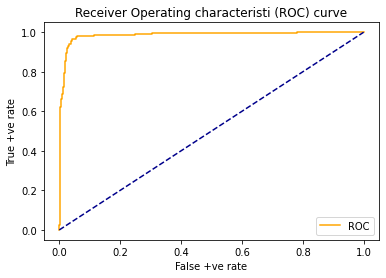

In [66]:
plot_roc_curve(fpr, tpr)